## 最小二乘法公式推导
为了探讨真实值y与一系列特征值x的关系，即求解一系列对应特征值的参数$\theta$值，对x与$\theta$进行数学建模，即构造$h_{\theta}(x) = \theta^{T}X$对y进行预测与拟合  
由于是拟合，则$h_{\theta}(x)$与y存在误差，即对于每一个数据样本都有$y^{(i)} = h_{\theta}(x^{(i)}) + \varepsilon^{(i)} = \theta^{T}X^{(i)} + \varepsilon^{(i)}$，而误差$\varepsilon^{(i)}$是独立并且具有相同分布与服从均值为0、方差为\$\theta^{2}$的正态分布  
则可以联立出以下公式:

$$ 
y^{(i)} = h_{\theta}(x^{(i)}) + \varepsilon^{(i)}
$$
$$
p(\varepsilon^{(i)}) = \frac{1}{(2\pi)^{1/2}\sigma} e^{\frac{-(\varepsilon^{(i)}-0)^{2}}{2\sigma^{2}}}
$$
可以得到以下结果：
$$
p(y^{(i)}|x^{(i)}; \theta) = \frac{1}{(2\pi)^{1/2}\sigma} e^{\frac{-(y^{(i)}-h_{\theta}(x^{(i)}))^{2}}{2\sigma^{2}}}
$$
由于每一个样本数据都是独立的，则可以用似然函数对其进行转变：
$$
L(\theta) = \prod_{i=1}^m{p(y^{(i)}|x^{(i)}; \theta)}
$$
但是乘法计算较为复杂，可以通过对数似然转换为加法计算：
$$
ln(L(\theta)) = ln(\prod_{i=1}^m{\frac{1}{(2\pi)^{1/2}\sigma} e^{\frac{-(y^{(i)}-h_{\theta}(x^{(i)}))^{2}}{2\sigma^{2}}}}) = mln(\frac{1}{(2\pi)^{1/2}\sigma}) - \frac{1}{2\sigma^{2}}\sum_{i=1}^m{(y^{(i)}-h_{\theta}(x^{(i)}))^{2}}
$$
这样，我们得到了目标函数$J(\theta) = \frac{1}{2}\sum_{i=1}^m{(y^{(i)}-h_{\theta}(x^{(i)}))^{2}} = \frac{1}{2}(X\theta-y)^{T}(X\theta-y)$  
此时，回顾我们一开始的目的，我们需要求出对应的$\theta$来使得我们预测的y越来越接近真实值，即我们要尽可能地让误差减少。因为误差$\varepsilon^{(i)}$服从正态分布，若要其减少，需要其对应靠近平均值的误差的概率密度p越来越大，即$J(\theta)$要达到最大值，因此我们需要对$J(\theta)$进行求偏导：
$$
\frac{\partial J(\theta)}{\partial\theta} = \frac{\partial(\frac{1}{2}(X\theta-y)^{T}(X\theta-y))}{\partial\theta} = \frac{1}{2}\frac{\partial((\theta^{T}X^{T}-y^{}T)(X\theta-y))}{\partial\theta} = \frac{1}{2}\frac{\partial(\theta^{T}X^{T}X\theta-\theta^{T}X^{T}y-y^{T}X\theta+y^{T}y)}{\partial\theta} = \frac{1}{2}(2X^{T}X-X^{T}y-(y^{T}X)^{T}) = X^{T}X\theta-X^{T}y
$$
当偏导$\frac{\partial J(\theta)}{\partial\theta}$等于0时，$J(\theta)$取得极值，此时$\theta = (X^{T}X)^{-1}X^{T}y$  
我们称$J(\theta) = \frac{1}{2}\sum_{i=1}^m{(y^{(i)}-h_{\theta}(x^{(i)}))^{2}}$为最小二乘法，而$\theta = (X^{T}X)^{-1}X^{T}y$为预测y的最佳参数。

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [11]:
X = 2*np.random.rand(100,1) # 随机生成100个数并构造出矩阵X
y = 4 + 3*X + np.random.rand(100,1) # 描述特征X与真实值y的关系, y的后缀表示真实值与预测值的差异

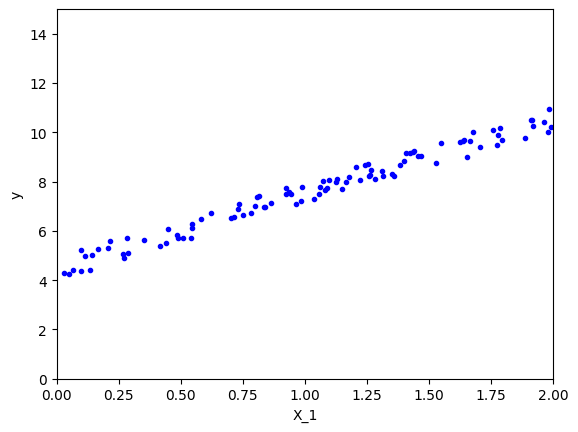

In [10]:
plt.plot(X, y, 'b.') # 对数据点进行绘图
plt.xlabel('X_1') # 定义x轴的名字
plt.ylabel('y') # 定义y轴的名字
plt.axis([0,2,0,15]) # 限制x轴与y轴的取值范围
plt.show()

In [53]:
X_b = np.c_[(np.ones((100, 1)), X)] # 为列矩阵X添加偏置项1便于进行矩阵乘法
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 代入最小二乘法的结果

In [52]:
X_new = np.array([[0],[2]]) # 随机找到取值区间里的两个点
X_new_b = np.c_[(np.ones((2, 1)), X_new)] # 为两个点添加偏置项便于矩阵乘法
y_predict = X_new_b.dot(theta_best) # 计算预测值

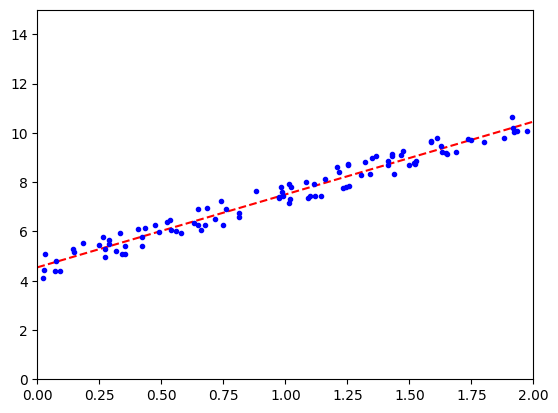

In [25]:
plt.plot(X_new, y_predict, 'r--') # 对预测数据点进行绘图
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15]) # 限制x轴与y轴的取值范围
plt.show() # 观察直线与散点图的位置关系

## 梯度下降
通俗解释：
* 引入：当我们得到一个目标函数，如何进行求解？
* 常规套路：交给机器一些目标函数的数据，然后告诉它什么样的学习方法是对的(即对象是目标函数)，让它朝此方向去做，这样的操作套路被称为机器学习。
* 如何优化：一步步完成迭代，每次优化一点并累积起来。
参数更新：
* 目标函数：$J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\sum_{i=1}^m{(y^{(i)}-h_{\theta}(x^{(i)}))^{2}}$
* 探讨：什么样的参数能使目标函数达到极值点。
* 梯度下降：1.找到当前最适合的梯度；
           2.走一小步然后更新一次梯度；
           3.按照梯度与步伐去更新参数。
梯度下降法：
* 方法准备：$\frac{\partial J(\theta)}{\partial \theta_{j}} = -\frac{1}{m}\sum_{i=1}^m({y^{(i)}-h_{\theta}(x^{(i)})})x_{j}^{i}$
* 批量梯度下降：$\theta_{j}^{'} = \theta_{j} + \frac{1}{m}\sum_{i=1}^m({y^{(i)}-h_{\theta}(x^{(i)})})x_{j}^{i}$
  (优点：容易得到最优解；缺点：由于每次都考虑所有样本，计算速度很慢。)
* 随机梯度下降：$\theta_{j}^{'} = \theta_{j} + (y^{(i)}-h_{\theta}(x^{(i)}))x_{j}^{i}$
  (优点：每次只随机找一个样本，迭代速度快；缺点：不一定每次迭代都朝着收敛的方向。)
* 小批量梯度下降法：$\theta_{j}^{'} = \theta_{j} - \alpha\frac{1}{10}\sum_{k=1}^{i+9}(y^{(k)}-h_{\theta}(x^{(k)}))x_{j}^{k}$
  (优点：每次更新选择一小部分数据来计算，更实用。)
优化参数设置：
* 学习率$\alpha$(步长)：对结果会产生巨大影响，一般小一些；
* 如何选择学习率：从小数值开始选，不适合的时候在变小；
* 批处理数量：32、64、128次均可以，很多时候还需考虑内存效率。

In [55]:
# 批量梯度下降法
eta = 0.1 # 定义学习率
n_iterations = 1000 # 定义迭代次数
m = 100 # 定义样本个数
theta = np.random.rand(2,1) # 对权重参数进行随机初始化
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y)# 计算梯度
    theta = theta - eta*gradients # 更新参数

In [54]:
theta_path_bgd = [] # 保存参数
def plot_gradient_descent(theta,eta,theta_path = None): # 画图函数
    m = len(X_b) # 得到样本数量
    plt.plot(X,y,'b.')
    n_iterations = 1000 # 定义迭代次数
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y) # 计算梯度
        theta = theta - eta*gradients # 更新参数
        if theta_path is not None: # 条件判断保存参数
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta = {}'.format(eta)) # 动态传入学习率

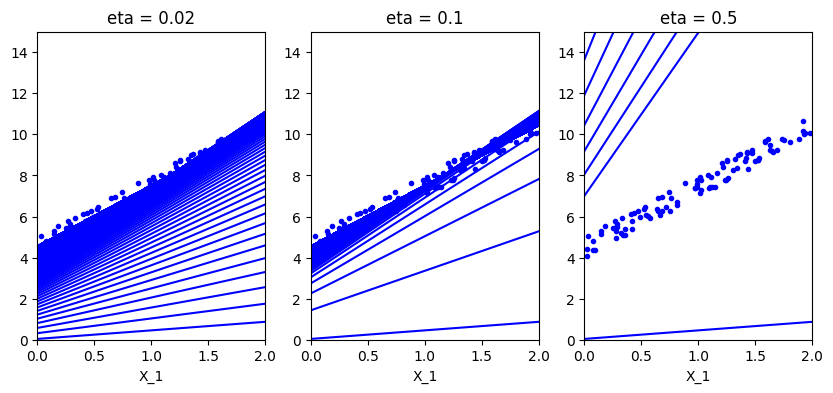

In [51]:
theta  = np.random.rand(2,1) # 随机初始化参数值

plt.figure(figsize=(10,4)) # 指定绘图大小
plt.subplot(131) #绘制第1行3个中的第一个子图
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()